<a href="https://colab.research.google.com/github/DiyaBansal0325/Summer-training/blob/main/ML%20Models%20Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Methods to apply Unsupervised ML Model

#KMeans Clustring

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("mall.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df = df.drop(columns= ['CustomerID','Genre'])

In [6]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
x = df.iloc[: , [0,1]].values

In [8]:
from sklearn.cluster import KMeans

In [9]:
import matplotlib.pyplot as plt

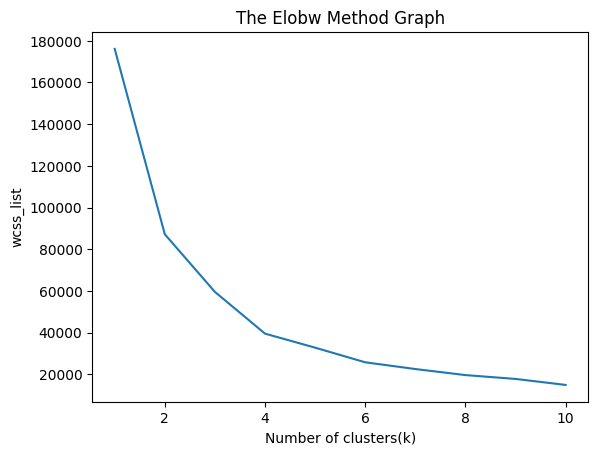

In [10]:
a = []
for i in range(1,11):
  b = KMeans(n_clusters = i , init = 'k-means++' , random_state=42)
  b.fit(x)
  a.append(b.inertia_)

plt.plot(range(1,11) , a)

plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

From above plot , we can see the elbow point is 4. So the number of clusters here will be 4

In [11]:
b = KMeans(n_clusters =  4, init = 'k-means++', random_state= 42)
y_predict = b.fit_predict(x)

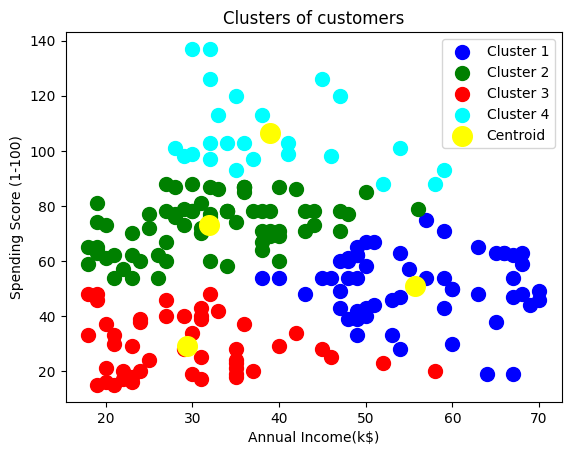

In [15]:
#visualizing the clusters
plt.scatter(x[y_predict == 0,0], x[y_predict == 0,1], s = 100, c = 'blue', label = 'Cluster 1') #For first cluster
plt.scatter(x[y_predict == 1,0], x[y_predict == 1,1], s = 100, c = 'green', label = 'Cluster 2') #For second cluster
plt.scatter(x[y_predict == 2,0], x[y_predict == 2,1], s = 100, c = 'red', label = 'Cluster 3') #For third cluster
plt.scatter(x[y_predict == 3,0], x[y_predict == 3,1], s = 100, c = 'cyan', label = 'Cluster 4') #For fourth cluster

plt.scatter(b.cluster_centers_[:,0],b.cluster_centers_[:,1], s = 200 , c = 'yellow',
            label = 'Centroid')
plt.title("Clusters of customers")
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#Pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [17]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
df = df.drop(columns= ['User ID', 'Gender'])

In [19]:
x = df.drop(columns= ['Purchased'],axis=1)
y = df['Purchased']

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=2)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [21]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [22]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [23]:
y_pred = pipe.predict(x_test)

In [24]:
accuracy_score(y_test , y_pred)

0.8875